# I have removed the ABSHID and SF2SA1QN

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pyecharts.charts import HeatMap
import pyecharts.options as opts
from copy import copy

In [302]:
## mytest_data consists of "ABSPID" ,ten response variables and predictor variables (6 confounders + nutritions)
file_name = "mytest_data.csv"
wholedata = pd.read_csv(file_name)
col_y = ["ABSPID", "BMISC", "HCHOLBC", "CHOLRESB", "CHOLNTR", "HDLCHREB", "LDLNTR",
                "LDLRESB", "DIASTOL", "SYSTOL", "HSUGBC"]
confounders = ["ADTOTSE", "SMKSTAT", "AGEC", "EXLWTBC", "SEX", "DIAHBRSK"]
data_y = wholedata[col_y]
data_x = wholedata.iloc[:,17:206] #Nutrition Data

display(data_x)

## ANOTHER WAY

## use binary classificaiton to do the features selection 
## we have ten response variables to predict CV
## Step 1: classify these ten varibales to 2 parts: normal (label 0) and abnormal (label 1) 
## Step 2 : Label the person with 0 (no risk) and 1(has risk of CV) :if all ten varibles show 0 then we can label this person 0.
## Otherwise, we label this person 1
## So 10 variables become 1 y, and next we can do the features selection


,BMR,EIBMR1,EIBMR2,ENERGYT1,ENERGYT2,ENRGYT1,ENRGYT2,MOISTT1,MOISTT2,PROTT1,...,MEATLD2N,MEATL2N,WATER2N,UNSAT2N,FRESUG2N,ADDSUG2N,PEFRESD1,PEADDSD1,PEFRESD2,PEADDSD2
0,7197.299805,1.1444,0.9336,8236.339844,6719.229980,8114.450195,6516.830078,2615.590088,3120.030029,134.250000,...,0.00000,2.17935,8.76311,7.33950,31.653999,31.653999,6.654,6.654000,7.538000,7.538000
1,5686.799805,1.2251,1.5802,6966.799805,8986.160156,6689.319824,8744.910156,3612.439941,3834.110107,53.529999,...,0.00000,2.01322,10.31634,1.65529,39.176998,27.541000,11.517,11.203000,6.976000,4.904000
2,5479.399902,1.7154,1.8285,9399.240234,10018.849610,9216.230469,9638.129883,3290.219971,4331.740234,107.309998,...,0.00000,2.17400,5.22468,5.80314,90.664001,60.362000,10.564,6.288000,14.479000,9.640000
3,5439.799805,2.2243,0.7081,12099.730470,3852.060059,11895.650390,3801.770020,2299.159912,843.849976,105.180000,...,0.00000,0.55460,0.00000,1.54011,81.547997,60.588001,13.033,9.278000,33.872002,25.166000
4,8073.799805,1.5988,0.8448,12908.639650,6820.890137,12641.000000,6618.140137,4745.049805,2726.239990,107.739998,...,2.36923,0.00000,8.16093,0.47500,67.526001,67.526001,20.045,19.785999,15.840000,15.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,4959.000000,1.1214,1.1987,5560.779785,5944.479980,5434.790039,5840.839844,1750.030029,2444.360107,78.930000,...,0.00000,1.50709,5.19040,1.59188,28.312000,18.868000,10.427,7.021000,7.620000,5.079000
2929,5703.799805,1.2032,0.9515,6862.700195,5426.950195,6634.700195,5287.330078,5607.080078,5369.709961,67.639999,...,0.00000,1.10625,20.11270,6.50945,0.451000,0.340000,13.000,12.134000,0.133000,0.100000
2930,5785.399902,1.3225,997.0000,7651.229980,0.000000,7287.740234,0.000000,4002.540039,0.000000,90.250000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,8.470,7.287000,0.000000,0.000000
2931,5724.200195,1.1474,997.0000,6568.200195,0.000000,6474.379883,0.000000,3703.110107,0.000000,49.209999,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,6.574,5.510000,0.000000,0.000000


# Dimensional reduction and feature selection


## High Correlation Filter

In [355]:
class cal_corr:
    
    def __init__(self, df, n_clusters, threshold):
  
        self.df = self.handle_df(df.copy())
  
        self.n_clusters = n_clusters

        self.threshold = threshold

        self.corr = None
        

    def corr_matrix(self):

        return self.corr
    

    def corr_pairs(self):

        return self.pairs
        
        
    def handle_df(self,df):

        
        for item in df.select_dtypes(include=["object"]):
            df[item] = df[item].astype('category').cat.codes
        
        df = df.fillna(df.median())
        df = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
        print(df.shape)
        return df
        
    def order_by_kmeans(self):

        kk = KMeans(n_clusters = self.n_clusters)
        res = kk.fit_predict(self.df.T)
        
        self.df = self.df.append(pd.Series(res,index=self.df.columns),ignore_index=True)
        self.df.sort_values(by = self.df.shape[0]-1,axis=1,inplace=True)
        self.df.drop(self.df.shape[0]-1,inplace=True)
        
        print(self.df.shape)
        
    def corr_heat_map(self):

        self.order_by_kmeans()
        
        self.corr = self.df.corr(method="pearson")
        self.corr = self.corr.round(3)
        self.corr = self.corr.apply(lambda x: abs(x))
        myvalues = []
        for i in range(len(self.corr.index)):
            for j in range(len(self.corr.index)):
                tmp = [i, j, self.corr.iloc[i, j]]
                myvalues.append(copy(tmp))
        self.__setattr__('pairs',myvalues)        
        
        heat_map = HeatMap(init_opts=opts.InitOpts(width="1440px", height="1440px"))\
            .add_xaxis(list(self.corr.columns))\
            .add_yaxis("corr", list(self.corr.index), myvalues) \
            .set_global_opts(
                title_opts=opts.TitleOpts(title="correlation of variables"),
                datazoom_opts=[opts.DataZoomOpts(is_show=True, is_realtime=True), ],
                visualmap_opts=opts.VisualMapOpts(min_=-1.2, max_=1.2, pos_right=20),
                toolbox_opts=opts.ToolboxOpts(is_show=True),
                xaxis_opts=opts.AxisOpts(type_="category", is_scale=True, is_inverse=True, axislabel_opts=opts.LabelOpts(is_show=True, rotate=-60)),
                yaxis_opts=opts.AxisOpts(is_scale=True, is_inverse=False, axislabel_opts=opts.LabelOpts(is_show=True, position="right")),
                tooltip_opts=opts.TooltipOpts(is_show=True))\
            .set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="insideBottom"))

        heat_map.render()
        

    def drop_hight_corr(self):

        
        cor_pair = self.pairs
        cor_pair.sort(key=lambda x:x[2],reverse=True)
        del_pair = []
        del_col = []
        for item in cor_pair:
            if (item[0]==item[1])|(set(item[:2]) in del_pair)|(item[0] in del_col)|(item[1] in del_col):
                continue

            if item[2]>self.threshold:
                c1 = self.corr.iloc[item[0],[x for x in range(self.corr.shape[0]) if x not in del_col]].mean()
                c2 = self.corr.iloc[item[1],[x for x in range(self.corr.shape[0]) if x not in del_col]].mean()

                del_col.append(item[0] if c1>c2 else item[1])
                del_pair.append(set(item[:2]))
            else:
                break
            
        del_col_name = self.corr.iloc[:,del_col].columns
        
        return list(del_col_name)

#  Response variables(y) dataset
if __name__ == '__main__':
    c = cal_corr(df=data_y, n_clusters=5, threshold=0.7)
    c.corr_heat_map()
    del_col = c.drop_hight_corr()
    print(del_col)

(2933, 11)
(2933, 11)
['CHOLRESB', 'LDLRESB', 'CHOLNTR']


## Chi2 feature selection

## PCA 


The variance value of principal component after dimensionality reduction is： [4.20198013e+02 6.11761373e+01 2.65686355e+01 6.42767395e+00
 1.70234749e+00 1.26650320e+00 2.40600810e-01 2.26410704e-01
 1.02803677e-01 3.95570335e-02]
The ratio of variance value of principal component to total variance after dimensionality reduction is： [8.11273447e-01 1.18112352e-01 5.12958840e-02 1.24098664e-02
 3.28671072e-03 2.44522911e-03 4.64526348e-04 4.37129606e-04
 1.98482360e-04 7.63724956e-05]
The component of the maximum variance after dimensionality reduction is： [[ 7.00146597e-02 -7.41489817e-03  1.04963658e-02  2.57391774e-03
  -3.41123971e-03  1.62760253e-03  4.83928983e-03  4.05896542e-01
   9.11117980e-01 -6.98253906e-04]
 [-2.14417539e-01 -1.62518553e-02 -3.15277094e-02 -4.35456059e-03
   7.41078770e-03 -5.33378670e-03 -3.15730563e-02 -8.84703943e-01
   4.11054946e-01  7.57616901e-04]
 [ 9.71397923e-01 -3.57845634e-02 -1.70547295e-02 -3.02571222e-03
  -6.61172212e-02  5.03172693e-04 -8.0

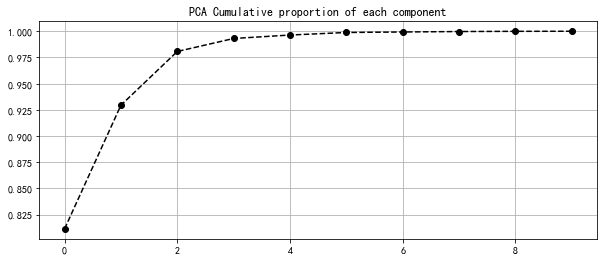

In [284]:
pca_y = PCA(n_components=10)
Person_ID = ["ABSPID"]
y = data_y.drop(Person_ID, axis = 1)
pca_y.fit(y)
projected=pca_y.fit_transform(y)
print('The variance value of principal component after dimensionality reduction is：',pca_y.explained_variance_)
print('The ratio of variance value of principal component to total variance after dimensionality reduction is：',pca_y.explained_variance_ratio_)
print('The component of the maximum variance after dimensionality reduction is：',pca_y.components_)
print('The number of principal components after dimensionality reduction is：',pca_y.n_components_)
s_y = pca_y.explained_variance_
c_s_y = pd.DataFrame({'b': s_y,'b_sum': s_y.cumsum() / s_y.sum()})
c_s_y['b_sum'].plot(style= '--ko',figsize= (10, 4))
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
plt.title('PCA Cumulative proportion of each component')
plt.grid()
plt.savefig('./PCA_Y.jpg')
plt.show()

The variance value of principal component after dimensionality reduction is： [5.38315967e+07 2.69846922e+07 2.29930526e+07 1.46169568e+07
 4.98696750e+06 2.89511648e+06 2.04703164e+06 1.41706641e+06
 1.20485600e+06 1.08094852e+06 1.04406314e+06 9.86245415e+05
 8.08190248e+05 7.49393312e+05 5.63263058e+05 5.20062260e+05
 3.97625574e+05 3.27281373e+05 1.96689942e+05 1.69964411e+05
 1.43847851e+05 1.14260937e+05 1.10164115e+05 1.01062612e+05
 7.27508190e+04 5.82530644e+04 4.61640125e+04 4.39105838e+04
 3.57441891e+04 3.22655819e+04 3.04370842e+04 2.88497623e+04
 2.81844394e+04 1.77303010e+04 1.64664456e+04 1.40511010e+04
 1.05407637e+04 8.76471928e+03 7.85503133e+03 7.29604815e+03
 6.28457952e+03 5.39507266e+03 5.28185179e+03 4.57268550e+03
 4.24810104e+03 3.81813703e+03 3.50347795e+03 3.07124734e+03
 2.93945597e+03 2.76111213e+03 2.31103225e+03 2.14032971e+03
 1.78896754e+03 1.58456672e+03 1.47884936e+03 1.38785534e+03
 1.13678995e+03 7.79359930e+02 5.77624491e+02 4.71164042e+02
 3.94748

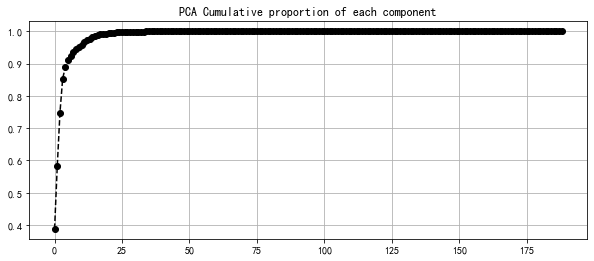

In [285]:
pca = PCA(n_components=189)
pca.fit(data_x)
projected=pca.fit_transform(data_x)
print('The variance value of principal component after dimensionality reduction is：',pca.explained_variance_)
print('The ratio of variance value of principal component to total variance after dimensionality reduction is：',pca.explained_variance_ratio_)
print('The component of the maximum variance after dimensionality reduction is：',pca.components_)
print('The number of principal components after dimensionality reduction is：',pca.n_components_)
s = pca.explained_variance_
c_s = pd.DataFrame({'b': s,'b_sum': s.cumsum() / s.sum()})
c_s['b_sum'].plot(style= '--ko',figsize= (10, 4))
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
plt.title('PCA Cumulative proportion of each component')
plt.grid()
plt.savefig('./PCA_X.jpg')
plt.show()

### For Fats

The variance value of principal component after dimensionality reduction is： [1.64114771e+06 1.02372105e+06 1.24189550e+03 8.93782510e+02
 9.32297529e+01 6.70397494e+01 5.06606198e+01 3.92010188e+01
 3.04265889e+01 1.71050906e+01 1.94021754e+00 1.27529269e+00
 4.88759341e-01 3.88907153e-01 3.40866063e-01 2.15294027e-01
 1.22482529e-02 8.28170883e-03 7.68218183e-03 5.05832990e-03]
The ratio of variance value of principal component to total variance after dimensionality reduction is： [6.15282695e-01 3.83803265e-01 4.65599049e-04 3.35088005e-04
 3.49527671e-05 2.51338728e-05 1.89931732e-05 1.46968542e-05
 1.14072326e-05 6.41286962e-06 7.27406968e-07 4.78119987e-07
 1.83240767e-07 1.45805183e-07 1.27794097e-07 8.07158847e-08
 4.59199255e-09 3.10489550e-09 2.88012683e-09 1.89641849e-09]
The component of the maximum variance after dimensionality reduction is： [[ 2.05769890e-02  1.62511712e-02  1.04519220e-02  7.52221039e-03
   6.66508774e-03  5.52599802e-03  1.55977100e-03  1.76612947e-03
  

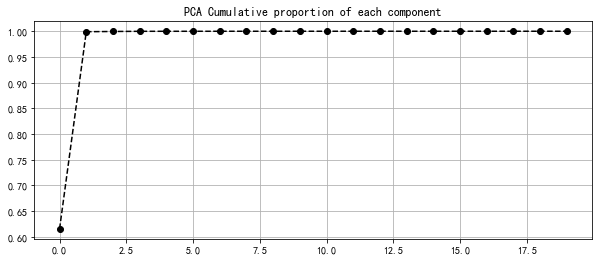

In [287]:
pca_c = PCA(n_components=20)
col_c = [ 'FATT1', 'FATT2', 'SATFATT1', 'SATFATT2', 'MUFATT1', 'MUFATT2', \
                                'PUFATT1', 'PUFATT2', 'TRANST1', 'TRANST2', 'FATPER1', 'FATPER2', 'SATPER1', 'SATPER2',\
                                'TRANPER1', 'TRANPER2', 'MONOPER1', 'MONOPER2', 'POLYPER1', 'POLYPER2']
pca_c.fit(data_x[col_c])
projected=pca_c.fit_transform(data_x[col_c])
print('The variance value of principal component after dimensionality reduction is：',pca_c.explained_variance_)
print('The ratio of variance value of principal component to total variance after dimensionality reduction is：',pca_c.explained_variance_ratio_)
print('The component of the maximum variance after dimensionality reduction is：',pca_c.components_)
print('The number of principal components after dimensionality reduction is：',pca_c.n_components_)
s_c = pca_c.explained_variance_
c_s_c = pd.DataFrame({'b': s_c,'b_sum': s_c.cumsum() / s_c.sum()})
c_s_c['b_sum'].plot(style= '--ko',figsize= (10, 4))
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
plt.title('PCA Cumulative proportion of each component')
plt.grid()
plt.savefig('./PCA_c.jpg')
plt.show()

In [273]:
pca = PCA(n_components=6)
newX = pca.fit_transform(data_x)
print(pca.explained_variance_ratio_)

[0.38781265 0.19440265 0.16564615 0.10530322 0.03592702 0.02085695]


In [276]:
x = data_x
target_col = ["HCHOLBC"]
y = wholedata[target_col]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=3,shuffle=False)
pca = PCA(n_components=5).fit(X_train)  
x_trainPca = pca.transform(X_train) 
x_testPca = pca.transform(X_test)

## Random Forest